In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')

## Exploration of Data 

In [3]:
print(df.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'deck' 'embark_town' 'alive' 'alone']


List of colunms define that which feature is catagorical and which feature is numerical or countinous 

Categorical ['survived', 'sex', 'embarked', 'pclass', embark_town, alone, alive, who, adult_male, deck]

Numerical [age, sibsp, parch, fare, ]

In [4]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


This helps to find the early statical analysis of the data frame 

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Analyzing the features by pivoting them

In [6]:
df[['pclass', 'survived', 'age']].groupby(['pclass'], as_index=False).mean()

,pclass,survived,age
0,1,0.629630,38.233441
1,2,0.472826,29.877630
2,3,0.242363,25.140620


In [7]:
df[['sex', 'survived', 'age']].groupby(['sex'], as_index=False).mean()

,sex,survived,age
0,female,0.742038,27.915709
1,male,0.188908,30.726645


In [8]:
df[['class', 'survived', 'age']].groupby(['class'], as_index=False).mean()

,class,survived,age
0,First,0.629630,38.233441
1,Second,0.472826,29.877630
2,Third,0.242363,25.140620


In [9]:
df[['embarked', 'survived', 'age']].groupby(['embarked'], as_index=False).mean()

,embarked,survived,age
0,C,0.553571,30.814769
1,Q,0.389610,28.089286
2,S,0.336957,29.445397


In [10]:
df[['who', 'survived', 'age']].groupby(['who'], as_index=False).mean()

,who,survived,age
0,child,0.590361,6.369518
1,man,0.163873,33.173123
2,woman,0.756458,32.000000


## Data Cleaning 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df = df.fillna(df.mean())

In [15]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [16]:
df =  df.drop(['embark_town','adult_male', 'alone', 'deck', 'class','alive'], axis = 1)

In [17]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
1,1,1,female,38.0,1,0,71.2833,C,woman
3,1,1,female,35.0,1,0,53.1000,S,woman
6,0,1,male,54.0,0,0,51.8625,S,man


## Exploring & Analyzing Features using Visualization

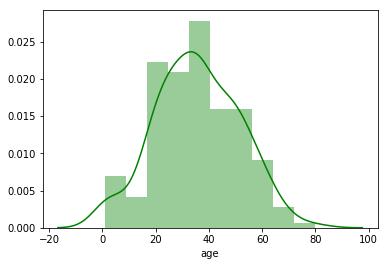

In [18]:
sns.distplot(df["age"], color = "Green")

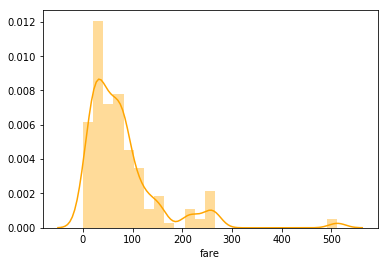

In [19]:
sns.distplot(df["fare"], color = "Orange")

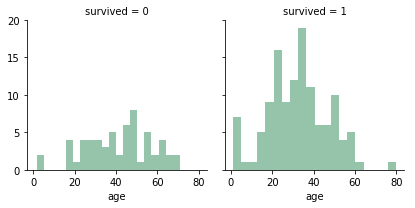

In [20]:
grid1 = sns.FacetGrid(df, col='survived')
grid1.map(plt.hist, 'age', alpha=.5, bins=20, color = "Seagreen")

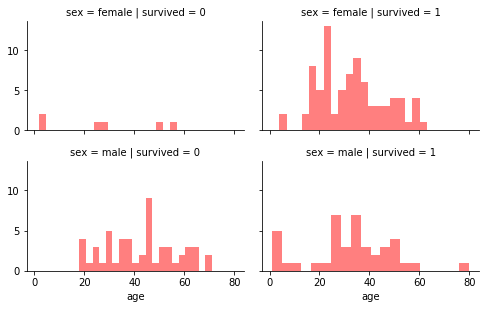

In [21]:
grid2 = sns.FacetGrid(df, col='survived', row='sex', size=2.2, aspect=1.6)
grid2.map(plt.hist, 'age', alpha=.5, bins=20, color = "Red")

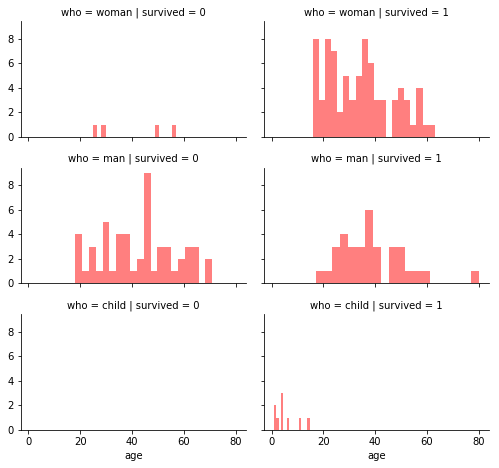

In [22]:
grid3 = sns.FacetGrid(df, col='survived', row='who', size=2.2, aspect=1.6)
grid3.map(plt.hist, 'age', alpha=.5, bins=20, color = "Red")

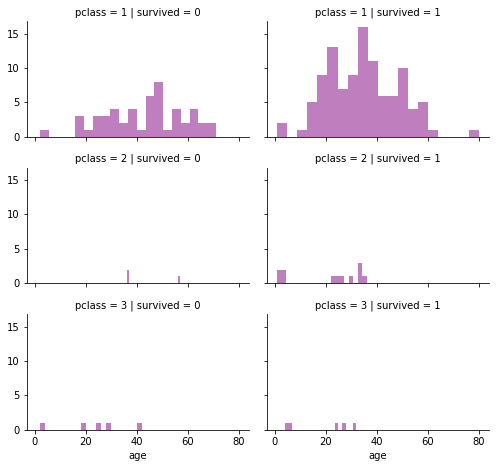

In [23]:
grid4 = sns.FacetGrid(df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid4.map(plt.hist, 'age', alpha=.5, bins=20, color = "Purple")

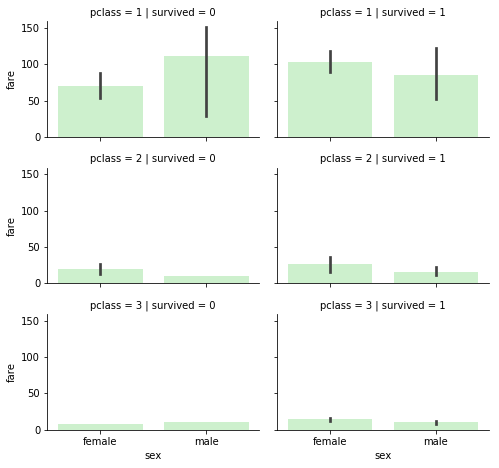

In [24]:
grid5 = grid = sns.FacetGrid(df, row='pclass', col='survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, color = "LightGreen")

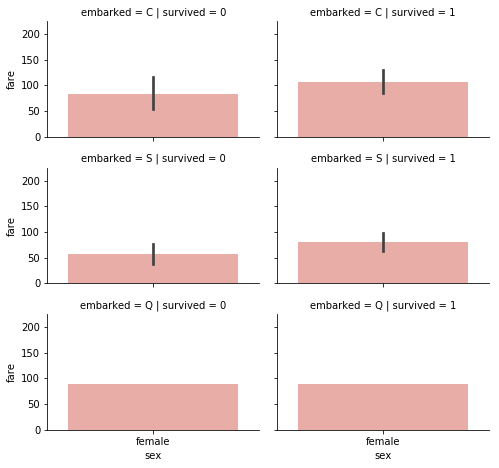

In [25]:
flatui = ["#e74c3c", "#2ecc71"]
grid5 = grid = sns.FacetGrid(df, row='embarked', col='survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, palette= flatui)

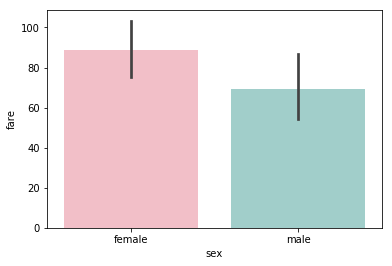

In [26]:
grid6 = sns.barplot(x='sex', y='fare', alpha=.5, data = df, palette='husl')

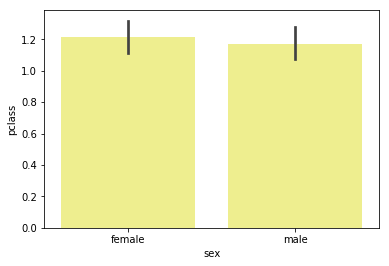

In [27]:
grid7 = sns.barplot(x='sex',y='pclass', alpha=.5, color = 'Yellow', data = df)

## Observation

- Female survived more than male
- First class passenger survived more than second and third class
- In pclass = 1 there are more survivor than other two and female are more than male
- Fares of Pclass = 1 are more than other two
- Embarked = C have more fares and more survival than Q & S

## Dropping & Exploring new Features

In [28]:
df = pd.get_dummies(df)

who_dummies = pd.get_dummies(df["who"]).rename(columns = lambda x: 'who_' + str(x))
emb_dummies = pd.get_dummies(df["embarked"]).rename(columns = lambda y: 'emb_' + str(y))
sex_dummies = pd.get_dummies(df["sex"]).rename(columns = lambda z: 'sex_' + str(z))

df = pd.concat([df, who_dummies, emb_dummies, sex_dummies], axis = 1)

In [29]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1
6,0,1,54.0,0,0,51.8625,0,1,0,0,1,0,1,0
10,1,3,4.0,1,1,16.7000,1,0,0,0,1,1,0,0
11,1,1,58.0,0,0,26.5500,1,0,0,0,1,0,0,1


In [30]:
X = df.drop(['survived'], axis = 1)
y = df.iloc[:, 0]

In [31]:
X.head(3)

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1
6,1,54.0,0,0,51.8625,0,1,0,0,1,0,1,0


In [32]:
y.head(3)

1    1
3    1
6    0
Name: survived, dtype: int64

# Feature Scaling

Apply feature scaling on our X variable for more accuracy to apply ML algorithm and run ML algos correctly

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scX = StandardScaler()

In [35]:
X_scale = scX.fit_transform(X)
#X_test = scX.transform(X_test)

## Applying Logistic Regression on data model

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log = LogisticRegression()
log_model = log.fit(x_train, y_train)
log_pred = log.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,classification_report, classification


In [42]:
train_accuracy_log = round(log_model.score(x_train, y_train)*100,2)
print("Train Accuracy Log:", train_accuracy_log)

Train Accuracy Log: 75.42


In [43]:
test_accuracy_log = round(log_model.score(x_test, y_test)*100,2)
print("Test Accuracy Log:", test_accuracy_log)

Test Accuracy Log: 81.25


In [44]:
cr = classification_report(y_test, log_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        20
           1       0.90      0.82      0.86        44

   micro avg       0.81      0.81      0.81        64
   macro avg       0.78      0.81      0.79        64
weighted avg       0.83      0.81      0.82        64



In [46]:
cm = confusion_matrix(y_test, log_pred)
print(cm)

[[16  4]
 [ 8 36]]


# Applying K-NN Algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p = 2)
knn_model = knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [49]:
train_accuracy_log = round(knn.score(x_train, y_train)*100,2)
print("Train Accuracy Log:", train_accuracy_log)

Train Accuracy Log: 77.97


In [50]:
train_accuracy_log = round(knn.score(x_test, y_test)*100,2)
print("Test Accuracy Log:", train_accuracy_log)

Test Accuracy Log: 64.06


In [51]:
cm = confusion_matrix(y_test, knn_pred)
cm

array([[ 6, 14],
       [ 9, 35]], dtype=int64)

# Applying Random Forest Algorithm

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model = RandomForestClassifier(n_estimators=10, criterion='entropy')

In [54]:
model_train_rf = model.fit(x_train, y_train)
model_predict_rf = model.predict(x_test)

In [55]:
train_accuracy_forest = round(model_train_rf.score(x_train, y_train)*100,2)
print("Train Accuracy:", train_accuracy_forest)

Train Accuracy: 97.46


In [56]:
test_accuracy_forest = round(model_train_rf.score(x_test, y_test)*100,2)
print("Test Accuracy:", test_accuracy_forest)

Test Accuracy: 75.0


In [57]:
cm_rf = confusion_matrix(y_test, model_predict_rf)

In [58]:
cm_rf

array([[11,  9],
       [ 7, 37]], dtype=int64)

In [59]:
model_predict_rf

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [60]:
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [61]:
log_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [62]:
rf_roc = roc_auc_score(y_test, model_predict_rf)
print('RF ROC = %.3f' % rf_roc)

RF ROC = 0.695


In [63]:
knn_roc = roc_auc_score(y_test, knn_pred)
print('KNN ROC = %.3f' % knn_roc)

KNN ROC = 0.548


In [64]:
lt_roc = roc_auc_score(y_test, log_pred)
print('RF ROC = %.3f' % lt_roc)

RF ROC = 0.809


### Saving Predicted Values

In [65]:
df_survived = df[]

NameError: name 'p' is not defined

In [66]:
np.savetxt("RF_Prediction.csv", model_predict_rf, delimiter=",")

In [67]:
LR_Predittion.columns = ['Survived']
LR_Predittion = pd.DataFrame(model_predict_rf, columns=['Survived'])

NameError: name 'LR_Predittion' is not defined

In [ ]:
LR_Predittion.to_csv('RF_Prediction_New.csv')

In [ ]:
LR_Predittion